# MA943 - Numerical Methods

* <font color=blue> Well done. Comments and marks are in blue text throughout.</font>
* <font color=blue> Each question is worth 15 marks and there are 10 marks for clarity and presentation.</font>
* <font color=blue> I gave you 10/10 for clarity and presentation. You have clearly taken a lot of care with this. Good job! </font>


<font color=blue>
Overall mark: 15 + 15 +15 + 13 +15 + 15 + 10 = 98/100
</font>

In [12]:
15 + 15 +15 + 13 +15 + 15 + 10 

98

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

In [1]:
using PyPlot
using Conda
Conda.add("mpmath")

Solving environment: ...working... done


openssl 1.0.2n: ########## | 100% 
ca-certificates 2017.08.26: #######5   |  75% 


## Package Plan ##

  environment location: /Users/colmconnaughton/.julia/v0.6/Conda/deps/usr

  added / updated specs: 
    - mpmath


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2n             |       hdbc3d79_0         3.4 MB
    ca-certificates-2017.08.26 |       ha1e5d58_0         264 KB
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following NEW packages will be INSTALLED:

    ca-certificates: 2017.08.26-ha1e5d58_0

The following packages will be UPDATED:

    openssl:         1.0.2l-0              --> 1.0.2n-hdbc3d79_0


Preparing transaction: ...working... 

ca-certificates 2017.08.26: ########## | 100% 


done
Verifying transaction: ...working... done
Executing transaction: ...working... done


**(1)** Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

**(2)** Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

** (6) ** Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [2]:
include("workbook1_recursion.jl");

The above file contains **three** functions: 
1. recusion_float32(N, a1, a2) takes a sequence length, N (Int64), two starting integers, a1 (Float32) and a2 (Float32), returns the corresponding sequence satisfying the recurrence relationship as an array (Array{Float32}). 
2. recusion_float64(N, a1, a2) takes a sequence length, N (Int64), two starting integers, a1 (Float64) and a2 (Float64), returns the corresponding sequence satisfying the recurrence relationship as an array (Array{Float64}). 
2. recusion_float128(N, a1, a2) takes a sequence length, N (Int128), two starting integers, a1 (Float128) and a2 (Float128), returns the corresponding sequence satisfying the recurrence relationship as an array (Array{Float128}). 

We generate sequences satisfying recurrence relationship with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$ under different precision floating point arithmetic.

In [3]:
N=Int64(80);
# calculate the first 80 terms using single precision floating point arithmetic (Float32 in Julia)
a32=recusion_float32(N,Float32(1),Float32(2)/Float32(3));
# calculate the first 80 terms using double precision floating point arithmetic (Float64 in Julia)
a64=recusion_float64(N,Float64(1),Float64(2)/Float64(3));
# calculate the first 80 terms using 128 bit precision
a128=recusion_float128(N,BigFloat(1),BigFloat(2)/BigFloat(3));

Here is the plot of the resulting sequence under Float32 on a lin-log plot:

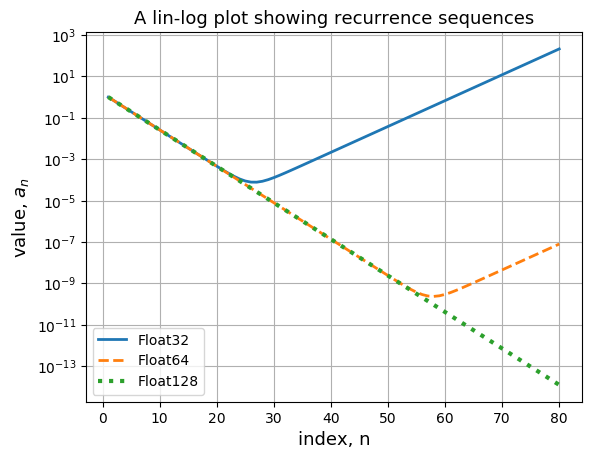

In [4]:
# plot the resulting sequences under different precision floating point arithmetic on a lin-log plot.
plot(1:1:N,a32,linewidth=2,linestyle="-",label="Float32")
plot(1:1:N,a64,linewidth=2,linestyle="--",label="Float64")
plot(1:1:N,a128,linewidth=3,linestyle=":",label="Float128")
title("A lin-log plot showing recurrence sequences",fontsize=13)
xlabel("index, n",fontsize=13)
ylabel(L"value, $a_n$",fontsize=13)
yscale("log")
grid()
legend()
show()

**(3)** Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the allowed values of $x$.

Consider the recursion relation

$$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1},$$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 



Assume the ansatz is $$a_n=x^n, x^{n+1}=2\, x^n-\frac{8}{9}\, x^{n-1}.$$ 

Then we have $x^2-2x+\frac{8}{9}=0$, and the solution is $x_1=\frac{4}{3}$ and $x_2=\frac{2}{3}$.

Therefore the general solution is 
$$a_n=C_1 \, (\frac{4}{3})^n + C_2 \, (\frac{2}{3})^n,$$ where $C_1$ and $C_2$ are constants.

**(4)** Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

Substituting $a_1=1$ and $a_2=\frac{2}{3}$ into the general solution gives

\begin{align*}
a_1&=C_1 (\frac{4}{3})^1 + C_2 (\frac{2}{3})^1=1,\\
a_2&=C_1 (\frac{4}{3})^2 + C_2 (\frac{2}{3})^2=\frac{2}{3}.
\end{align*}


Thus we obtain $C_1=0, \, C_2=\frac{3}{2}$. Substituting back $C_1$ and $C_2$ to the general solution yields the epression for $a_n$.

The solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$ is $$a_n=\frac{3}{2} \big(\frac{2}{3}\big)^n=\big(\frac{2}{3}\big)^{n-1}.$$

**(5)** Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

Substituting $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$ into general solution gives
\begin{align*}
a_1&=C_1 (\frac{4}{3})^1 + C_2 (\frac{2}{3})^1=1,\\
a_2&=C_1 (\frac{4}{3})^2 + C_2 (\frac{2}{3})^2=\frac{2}{3}+\epsilon.
\end{align*}

Then $C_1=\frac{9}{8}\epsilon, \, C_2=\frac{3}{2}-\frac{9}{4}\epsilon$.

Thus the solution that satisfies the perturbed initial conditions $a_1=1$ and 
$a_2=\frac{2}{3}+\epsilon$ is $$a_n=\big(\frac{9}{8}\epsilon\big)\big(\frac{4}{3}\big)^n + \big(\frac{3}{2}-\frac{9}{4}\epsilon\big)\big(\frac{2}{3}\big)^n.$$

**Explain numerical results:**

From (4), the solution of $a_n$ that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$ is $a_n=(\frac{2}{3})^{n-1}$. When $n$ tends to infinity, $a_n$ tends to 0. If computers have no errors in the arithmetic computation, $a_n$ should tend to 0 as n increases.

From (5), when there are errors $\epsilon$ related to the floating number $\frac{2}{3}$, the first term of $a_n$ tends to infinity and the second term tends to 0, so $a_n$ tends to infinity.

Taking derivative of $a_n$ with initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$ in (5) with respect to n gives 
$$\frac{d a_n}{dn}=\big(\frac{9}{8}\epsilon\big)\big(\frac{4}{3}\big)^n \log\frac{4}{3}+\big (\frac{3}{2}-\frac{9}{4}\epsilon\big)\big(\frac{2}{3}\big)^n \log\frac{2}{3}.$$

Equating this to 0 gives
$$\big(\frac{9}{8}\epsilon\big)\big(\frac{4}{3}\big)^n \log\big(\frac{4}{3}\big) = \big(\frac{9}{4}\epsilon-\frac{3}{2}\big)\big(\frac{2}{3}\big)^n \log\big(\frac{2}{3}\big).$$

Then $$n^*=\frac{\log\Big(\big(2-\frac{4}{3\epsilon}\big)\frac{\log\frac{2}{3}}{\log\frac{4}{3}}\Big)}{\log(2)}.$$

When $\epsilon$ is larger (i.e. precision floating point arithmetic (e.g. 64 in Float64) is smaller), $n^*$, the turning point in the figures, becomes smaller. This can be verified from the Figure 'A lin-log plot showing recurrence sequences'. 

<font color=blue>
Excellent answer.
</font>

<font color=blue>
15/15
</font>

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:



In [5]:
include("workbook1_mergesort.jl")

mergesort (generic function with 1 method)

The above file contains **two** functions: 
1. mergepresorted(A, B) takes two arrays which are already sorted in ascending order, A (Array{Int64,1}, size n) and B (Array{Int64,1}, size m), and returns an array (Array{Int64,1}, size n+m) which merges A and B and is in the ascending order; the corresponding computational complexity of this function is n+m. 

2. mergesort(A::Array{Int64,1}) takes an array of integers, whose length n, is a power of 2, i.e., $n=2^m$, and A (Array{Int64,1}), and returns an array sorted in the ascending order.


**(1)** Verify that the function mergepresorted(A, B) works as described.

In [6]:
print(mergepresorted([1,3,4,8,9], [2,5,6]));
print(mergepresorted([2,5,6], [4,8,9]));

[1, 2, 3, 4, 5, 6, 8, 9][2, 4, 5, 6, 8, 9]

From this experiment, we can see that the function mergepresorted(A, B) is capable of merging and sorting two sorted arrays with either different or same lengths. 

** (2) ** Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. 

See function mergesort(A::Array{Int64,1}) in "workbook1.mergesort.jl".

Verify that it works by generating some arrays of random integers and using your function to sort them.

In [7]:
# seed for random number generator. 
seed = 5761;
# initialise the random number generator
rng = MersenneTwister(seed);
# generate random numbers
A=rand(rng,1:100,2^4);
B=mergesort(A);
print(B);

[14, 15, 26, 27, 31, 42, 42, 48, 50, 52, 56, 71, 75, 88, 98, 99]

** (3) ** Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  

When $n=1$ the computational complexity is 1, because we only have one element to sort. For the array with arbitary length $n$, we seperate it into 2 arrays with length n/2, sort each array and merge the two sorted arrays. Therefore, the complexity for the merge sort of length n array is the summation of the twice of the complexity for the merge sort of length n/2 array and the complexity for merging 2 arrays of length n/2 (i.e. the complexity is n for this merge). 

** (4) ** Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.


Introducing the new variable p defined by $n = 2^p$ gives $F(2^p)=2F(2^{p-1})+2^p$ 

Let $b_p = F(2^p)$, and $b_p=2b_{p-1}+2^p$.

The initial condition is $b_0=F(2^0)=F(1)=1$.

**(5)** Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).

The associated homogeneous recursion relation is $b_p=2b_{p-1}$.

Assume the general solution is $b_p=x^p$. Then $x^p=2x^{p-1}$ and $x=2$. 

General solution to $b_p=2b_{p-1}$ is $b_p=C \, 2^p$ where C is a constant.

**(6)** Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.

Assume the particular solution of the original inhomogenous recursion relation is $b_p=A p 2^p$. 

Substituting particular solution into $b_p = 2 b_{p−1} + 2^p$ gives

$$A p 2^p = 2 A (p-1) 2^{p-1}+2^p = A (p-1) 2^{p}+2^p = Ap2^{p}+(1-A)2^{p},$$

which implies A=1.

The particular solution of the original inhomogenous recursion relation is thus $b_p=p 2^p$. Thus the general solution is given by $b_p = C 2^p + p 2^p$. Substituting the initial condition $b_0=1$ gives $C=1$. 

That is, the general solution is $b_p = 2^p + p 2^p$.

**(7)** Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.


$n=2^p$ implies $p=\log(n)/\log(2)$. Then $F(n)=n+n\log(n)/\log(2) \approx O(n\log(n))$.

** (8) ** Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

Here fllows the plot of experimental runtime and scaled theoretical complexity against the length of array on a lin-lin plot and a log-log plot:

In [8]:
# excution time of mergesort function for 10 realizations of arrays with length 2^i (i=1:15).
power=Int64(15);
power_vec=convert(Array{Int64},1:power);
nreal=Int64(10);
runtime=zeros(power,nreal);
for i=power_vec
    for j=1:nreal
        A=rand(rng,1:2^(power+1),2^i);
        runtime[i,j]=(@timed mergesort(A))[2];
    end
end

In [9]:
# average runtime of arrays with length 2^i (i=1:15)
mean_runtime=mean(runtime,2)
# theoretical runtime of arrays with length 2^i (i=1:15)
n=2.^power_vec;
theory_complex=n.*log.(n);

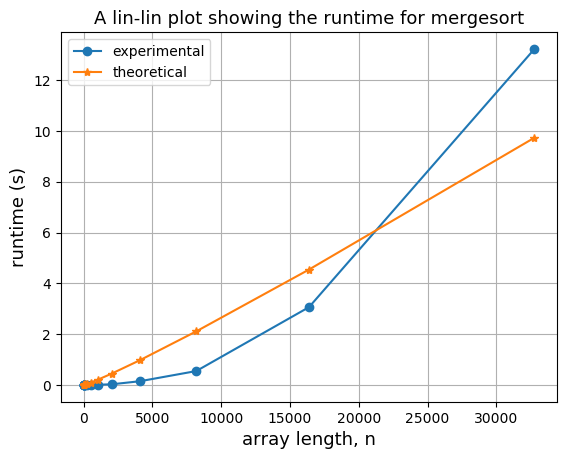

In [10]:
# plot the mean runtime and scaled theoretical complexity on a lin-lin plot
plot(n,mean_runtime,marker="o",markersize=6,label="experimental");
plot(n,theory_complex/35000,marker="*",markersize=6,label="theoretical"); 
# scale is obtained by observations
xlabel("array length, n",fontsize=13);
ylabel("runtime (s)",fontsize=13);
title("A lin-lin plot showing the runtime for mergesort",fontsize=13);
grid()
legend()
show()

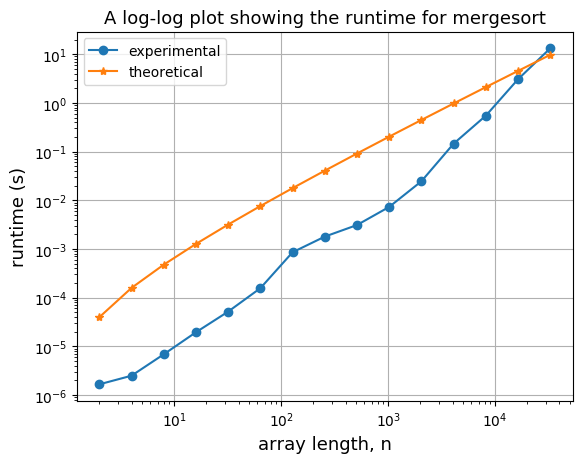

In [11]:
# plot the mean runtime and scaled theoretical complexity on a log-log plot
plot(n,mean_runtime,marker="o",markersize=6,label="experimental");
plot(n,theory_complex/35000,marker="*",markersize=6,label="theoretical");
xlabel("array length, n",fontsize=13);
ylabel("runtime (s)",fontsize=13);
title("A log-log plot showing the runtime for mergesort",fontsize=13)
grid()
legend()
yscale("log")
xscale("log")
show()

The numerical results share the similar trends as the scaled theoretical complexity.

<font color=blue>
It is much easier to compare the results on the log-log version of the plot. Excellent answer.
</font>

<font color=blue>
15/15
</font>